# <center> Punchlines as Mirrors: Social Attitudes, Politics, and Biases in the *The New Yorker* Caption Contest

Humor reflects society’s views, stereotypes, and political climate. The New Yorker Caption Contest offers a unique lens into this process, showing what people find acceptable, absurd, or taboo.

## <center> Narrative Flow
- **Introduction:** The Caption Contest as a cultural mirror — humor as social data.
- **Axis 1:** Professions & politics → humor about authority and power, *“What are people laughing about?”*
- **Axis 2:** Humor in time → historical & contextual dimensions, *“When and why do jokes resonate?”*
- **Axis 3:** Social norms → gender roles & taboos, testing the limits of humor, *“What’s acceptable or not?”*
- **Axis 4:** Biases → explain psychological and cultural mechanisms behind why we laugh, *“Why do we find it funny?”*
- **Conclusion:** Humor not only entertains — it reveals evolving attitudes, biases, and the cultural pulse of society.

> **Idea for website:** Each section should begin with a set of cartoons from the contest to immerse the viewer in humor before moving to analysis.

---

## <center> Axes of Research

### <center> 1. Professions, Politics, and Power

- **Professions in Humor:** Which jobs are depicted most often? Which are ridiculed vs. admired? What stereotypes recur (e.g., lawyers as tricksters, doctors as saviors)?
- **Politics in Humor:** Do captions reflect partisan leanings (Democrat vs. Republican) or mock political figures more broadly? Are political jokes rated differently?
- **Interplay:** Professions like politicians or lawyers sit at the crossroads of both — this axis highlights how authority and social roles are viewed through humor.

**Plots / Statistics:**
- Bar / Word Clouds: Frequency of professions mentioned in captions (“doctor,” “lawyer,” “politician”).
- Histograms / Line Plots: Frequency of professions across time.
- Grouped Bar Charts: Average funniness scores by profession category (healthcare, law, politics, education, etc.).
- Heatmaps: Cross-tab professions × sentiment (positive/negative/neutral).
- Cartoon + Caption Samples: A few annotated cartoons showing how professions are ridiculed.

**For Politics:**
- Timeline of mentions of political figures/parties.
- Sentiment distribution around Democrats vs. Republicans.
- Example “political joke clusters” side by side with major events (e.g., elections).

**Statistical Tests & Models:**
- t-tests / z-tests → Compare funniness scores of politicians vs. other professions.
- Multiple hypothesis testing (FDR/BH) → Control for comparisons across 30+ job categories.
- Network graphs → Co-occurrence of profession keywords with stereotypes (“lawyer–money,” “doctor–death”).
- Linear regression / lmplot → Test if political humor ratings rise around elections.
- Pearsonr / Spearmanr → Correlation between real-world political cycles and joke frequency.


In [39]:
import sys
print(sys.executable)

c:\Users\andra\OneDrive\Desktop\MA1_2025-2026\Applied_data_analysis\project\ada-2025-project-adacore42\_Other\andras_analysis\venv\Scripts\python.exe


In [40]:
#Loading packages (hopefully installed, all is correct version and whatnot)

# Data manipulation
import numpy as np
import pandas as pd
import pickle

# Statistical analysis
import scipy.stats as stats

# Language processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import spacy
import textblob as TextBlob
import contractions
import string
from collections import Counter
from nltk.corpus import wordnet as wn

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('punkt')       # Tokeniser
nltk.download('stopwords')   # Stopwords list
nltk.download('wordnet')     # Lemmatiser
nlp = spacy.load('en_core_web_sm')

stop_words = set(stopwords.words('english')) # Initialise stopwords
lemmatizer = WordNetLemmatizer() # Initialise lemmatiser

[nltk_data] Downloading package punkt to C:\Users\andra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\andra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


---
# <center> Preparing the Data

In this section, the code will preprocess the text of the captions and create a tokenized column suitable for analysis. The preprocessing steps include:

- Converting all text to **lower-case**  
- Removing **stopwords**  
- Eliminating **punctuation** such as dots and commas  
- **Expanding contractions**, e.g., “don’t” → “do not”, “it’s” → “it is”  
- **Correcting typos** to standardize common misspellings (optional but recommended for cleaner analysis)  
- **Removing very short tokens** (e.g., single letters or extremely short words)  
- **Lemmatizing words** to reduce them to their base forms, e.g., “running” → “run”, “better” → “good”  

These steps will prepare the captions for downstream analyses, such as frequency counts, word clouds, sentiment analysis, and extraction of professions or topics from the text.

I will only run this cell once, and save the outcome data in a new file, still within my folder here for the time being. For future work, there will be no need to do this work again. Then, I think this data should be added to the datapreparation step, as I am not doing anything fundamentally bad. I am creating new columns in the dataframes, so only the data becomes larger.


The code is in a __text__ file, it is not necessary to see here. the function to tokenise is included below.

In [41]:
def preprocess_text_list(entry, min_len=2):
    """Preprocess a list of text entries or a single string."""
    if isinstance(entry, list):
        text = " ".join(entry)
    elif isinstance(entry, str):
        text = entry
    else:
        return ""

    # Lowercase
    text = text.lower()

    # Expand contractions
    text = contractions.fix(text)

    # Typo correction
    text = str(TextBlob(text).correct())

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and short tokens
    tokens = [word for word in tokens if word not in stop_words and len(word) >= min_len]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [42]:
# Load clean data
fullldata = '../../data/cleaned_data_prepared.pkl'
with open(fullldata, "rb") as f:
    cleaned_stored_data = pickle.load(f)
print("Cleaned data loaded successfully.")
dataA_cleaned = cleaned_stored_data["dataA"]
dataC_cleaned = cleaned_stored_data["dataC"]
dataA_startID = cleaned_stored_data["dataA_startID"]
dataA_endID = cleaned_stored_data["dataA_endID"]
dataC_lastGoodID = cleaned_stored_data["dataC_lastGoodID"]


Cleaned data loaded successfully.


---
# <center> Professions in Humor

In this section, we will focus on how different professions are depicted in *The New Yorker* Caption Contest captions. Humor often reflects societal attitudes toward authority, expertise, and social roles, and professions provide a lens into these perceptions.  

## <center> Key Points
- **Frequency of depiction:** Which jobs appear most often in captions?  
- **Stereotypes:** How are certain professions portrayed — are they admired, ridiculed, or caricatured?  
  - Example stereotypes: lawyers as tricksters, doctors as saviors.  
- **Interplay with politics:** Some professions, like politicians or lawyers, intersect with both professional and political commentary, highlighting how authority and social power are perceived.  

## <center> Analytical Approach
To study professions in humor, we will:
- Count the number of times each profession is mentioned across all captions.  
- Visualize the distribution with **bar charts** or **word clouds**.  
- Examine sentiment associated with professions using **heatmaps**.  
- Compare average “funniness” scores by profession category to see which roles tend to be funnier.  
- Annotate examples of cartoons and captions to illustrate recurring jokes and stereotypes.

> This analysis will help us answer the question: *“What are people laughing about when it comes to professions?”*


We are only dealing with nouns when depicting jobs, so, as a first step, we need to extract all nouns from our captions. This will essentially reduce the size of the dataset and save us some more time. To do this, I will use the nltk package.

In [43]:
dataA_cleaned0 = dataA_cleaned.copy()
dataC_cleaned0 = dataC_cleaned.copy()


In [44]:
dataA_cleaned0[0].loc[0, 'cleaned_caption'] = 'congressman obstruction job'

To extract nouns, I used the following function. I removed the actual code which was used to run it and save it as it takes really long to run and I dont want to accidentally start it.

In [45]:

def extract_nouns(text):
    # Ensure the input is a string, not a list
    if not isinstance(text, str):
        text = " ".join(text)
    doc = nlp(text.lower())
    return [token.text for token in doc if token.pos_ in ("NOUN", "PROPN")]

In [46]:
# load the new pickle file to verify
noun_datafile = '../../data/cleaned_data_nouns.pkl'
with open(noun_datafile, "rb") as f:
    noun_stored_data = pickle.load(f)

# Verify the contents
print("Noun-extracted data loaded successfully.")
dataA1 = noun_stored_data["dataA_nouns"]
dataC1 = noun_stored_data["dataC_nouns"]
dataA_startID1 = noun_stored_data["dataA_startID"]
dataA_endID1 = noun_stored_data["dataA_endID"]
dataC_lastGoodID1 = noun_stored_data["dataC_lastGoodID"]


Noun-extracted data loaded successfully.


--- 
### Preparing External data

Now that I have extracted all the nouns from the tokenised captions, I can think about how to count occupations. This should in theory bring me closer to solving the problem. At first, I will work with the first contest only, and see if it can be generalised further.

I will use multiple datasets that I found on occupations, and I will merge the possible occupations to have a quite comprehensive list. The list will also be expanded by jobs which are frequently mentioned but are not "real" titles, and thus do not appear on each list. Such examples include "Physicist", "Lawyer", "President" and such. Everything will be tested on the first dataset we have, as running a comparison between the full data and a list of 50k occupations is tiring.

In [47]:
df = dataA1[0]

In [70]:
#load occupations
df_occupations = pd.read_csv("final_combined_occupations.csv")
import ast
# Convert each string to a Python list
df_occupations['Synonyms'] = df_occupations['Synonyms'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [71]:
occupations = df_occupations['Occupation']
synonyms_list = df_occupations['Synonyms'].tolist()

syn_to_occ = {
    synonym.lower(): occ
    for occ, synonyms in zip(occupations, synonyms_list)
    for synonym in synonyms
}

print(len(syn_to_occ))
print(list(syn_to_occ.items())[:20])  # see first 20 mappings

# we need to split the text before processing
def count_occupations(text):
    if isinstance(text, str):
        tokens = text.split()
    else:
        tokens = text
    occ_list = [syn_to_occ.get(tok.lower()) for tok in tokens if tok.lower() in syn_to_occ]
    return Counter(occ_list)

df['occupation_counts'] = df['cleaned_caption'].apply(count_occupations)

#can you show me the most common occupations found?
total_counts = Counter()
for counts in df['occupation_counts']:
    total_counts.update(counts)

# Show the most common occupations found
print(total_counts.most_common(100))

65550
[('filer', 'filer'), ('filers', 'filer'), ('supervisor', 'supervisor'), ('supervisors', 'supervisor'), ('occupational therapist', 'occupational therapist'), ('occupational therapists', 'occupational therapist'), ('auditor', 'auditor'), ('auditors', 'auditor'), ('polisher', 'polisher'), ('polishers', 'polisher'), ('fence erector', 'fence erector'), ('fence erectors', 'fence erector'), ('maker', 'maker'), ('makers', 'maker'), ('farmer', 'farmer'), ('farmers', 'farmer'), ('fire chief', 'fire chief'), ('fire chiefs', 'fire chief'), ('adjuster', 'adjuster'), ('adjusters', 'adjuster')]
[('leader', 218), ('solar', 11), ('director', 9), ('model', 7), ('navigator', 7), ('visitor', 6), ('captain', 5), ('display', 4), ('security', 4), ('outfitter', 4), ('cargo', 4), ('agent', 4), ('freak', 3), ('manager', 3), ('chef', 2), ('rounder', 2), ('boxer', 2), ('doctor', 2), ('superior', 2), ('shipper', 2), ('member', 2), ('scientist', 2), ('mannequin', 2), ('mechanic', 2), ('guard', 2), ('dealer', 

In [72]:
#do this for all dataA parts by adding new column 'occupation_counts'
for i in range(len(dataA1)):
    df = dataA1[i]
    df['occupation_counts'] = df['cleaned_caption'].apply(count_occupations)
    dataA1[i] = df
    print(f"Processed occupation counts for dataA part {(i+1)/len(dataA1)*100:.2f}%")

# Save the updated data with occupation counts
noun_stored_data_updated = {
    "dataA_nouns": dataA1,
    "dataC_nouns": dataC1,
    "dataA_startID": dataA_startID1,
    "dataA_endID": dataA_endID1,
    "dataC_lastGoodID": dataC_lastGoodID1
}

with open('../../data/cleaned_data_nouns_with_occupations.pkl', "wb") as f:
    pickle.dump(noun_stored_data_updated, f)
print("Updated noun-extracted data with occupation counts saved successfully.")

Processed occupation counts for dataA part 0.26%
Processed occupation counts for dataA part 0.52%
Processed occupation counts for dataA part 0.78%
Processed occupation counts for dataA part 1.04%
Processed occupation counts for dataA part 1.30%
Processed occupation counts for dataA part 1.56%
Processed occupation counts for dataA part 1.82%
Processed occupation counts for dataA part 2.08%
Processed occupation counts for dataA part 2.34%
Processed occupation counts for dataA part 2.60%
Processed occupation counts for dataA part 2.86%
Processed occupation counts for dataA part 3.12%
Processed occupation counts for dataA part 3.39%
Processed occupation counts for dataA part 3.65%
Processed occupation counts for dataA part 3.91%
Processed occupation counts for dataA part 4.17%
Processed occupation counts for dataA part 4.43%
Processed occupation counts for dataA part 4.69%
Processed occupation counts for dataA part 4.95%
Processed occupation counts for dataA part 5.21%
Processed occupation

In [73]:
#open the pickle
with open('../../data/cleaned_data_nouns_with_occupations.pkl', "rb") as f:
    noun_stored_data_loaded = pickle.load(f)

dataA1 = noun_stored_data_loaded["dataA_nouns"]
dataC1 = noun_stored_data_loaded["dataC_nouns"]
dataA_startID1 = noun_stored_data_loaded["dataA_startID"]
dataA_endID1 = noun_stored_data_loaded["dataA_endID"]
dataC_lastGoodID1 = noun_stored_data_loaded["dataC_lastGoodID"]

[('clown', 6016), ('doctor', 5434), ('president', 4782), ('lawyer', 4279), ('chef', 3840), ('model', 3686), ('owner', 3501), ('cook', 3320), ('therapist', 2430), ('leader', 2414), ('judge', 2346), ('artist', 2284), ('cop', 2181), ('captain', 2135), ('waiter', 2095), ('officer', 2027), ('security', 1975), ('employee', 1811), ('agent', 1671), ('manager', 1569), ('member', 1568), ('cowboy', 1446), ('driver', 1364), ('guard', 1343), ('attorney', 1287), ('accountant', 1148), ('cooper', 1101), ('pilot', 1044), ('cleaner', 945), ('author', 928), ('executive', 894), ('chief', 883), ('coach', 856), ('assistant', 853), ('singer', 847), ('packing', 830), ('layer', 826), ('solar', 816), ('police', 800), ('critic', 800), ('bitter', 798), ('director', 754), ('hunter', 727), ('slipper', 714), ('jumper', 703), ('teacher', 697), ('display', 697), ('magician', 680), ('baker', 680), ('grocer', 660), ('printer', 649), ('detective', 644), ('writer', 637), ('professor', 622), ('secretary', 612), ('film', 60

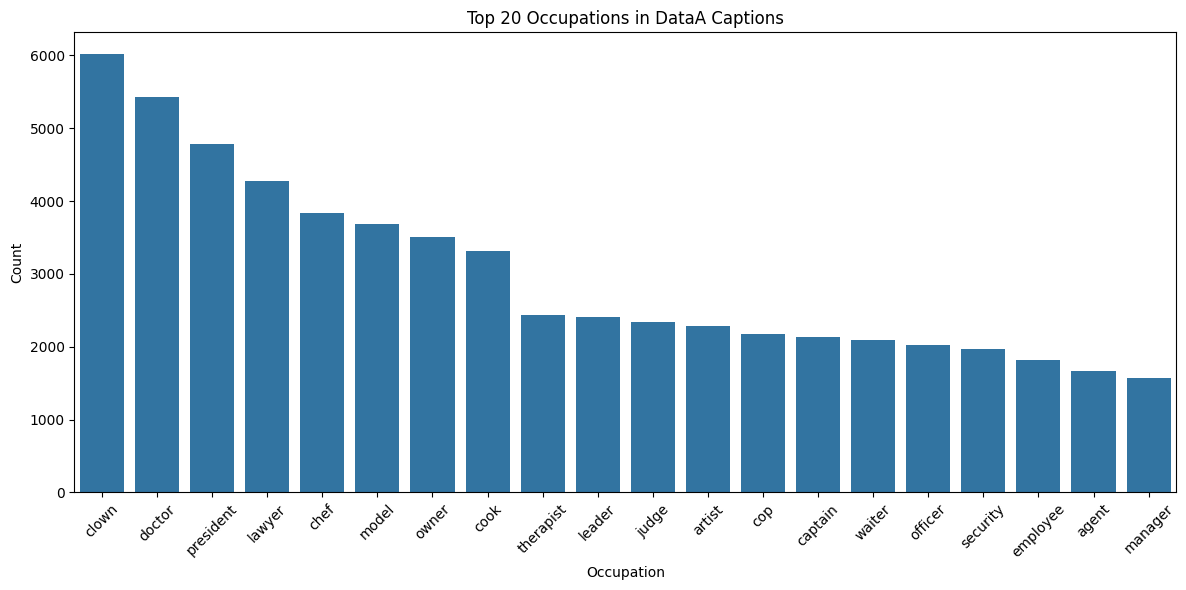

In [74]:
# count occurences of words and make a histogram
occupation_totals = Counter()
for i in range(len(dataA1)):
    df = dataA1[i]
    for counts in df['occupation_counts']:
        occupation_totals.update(counts)
# Show the most common occupations found
print(occupation_totals.most_common(100))

#histogram of top 20 occupations
top_20 = occupation_totals.most_common(20)
occupations, counts = zip(*top_20)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(occupations), y=list(counts))
plt.xticks(rotation=45)
plt.title("Top 20 Occupations in DataA Captions")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Processed occupation counts for nouns in dataA part 0.26%
Processed occupation counts for nouns in dataA part 0.52%
Processed occupation counts for nouns in dataA part 0.78%
Processed occupation counts for nouns in dataA part 1.04%
Processed occupation counts for nouns in dataA part 1.30%
Processed occupation counts for nouns in dataA part 1.56%
Processed occupation counts for nouns in dataA part 1.82%
Processed occupation counts for nouns in dataA part 2.08%
Processed occupation counts for nouns in dataA part 2.34%
Processed occupation counts for nouns in dataA part 2.60%
Processed occupation counts for nouns in dataA part 2.86%
Processed occupation counts for nouns in dataA part 3.12%
Processed occupation counts for nouns in dataA part 3.39%
Processed occupation counts for nouns in dataA part 3.65%
Processed occupation counts for nouns in dataA part 3.91%
Processed occupation counts for nouns in dataA part 4.17%
Processed occupation counts for nouns in dataA part 4.43%
Processed occu

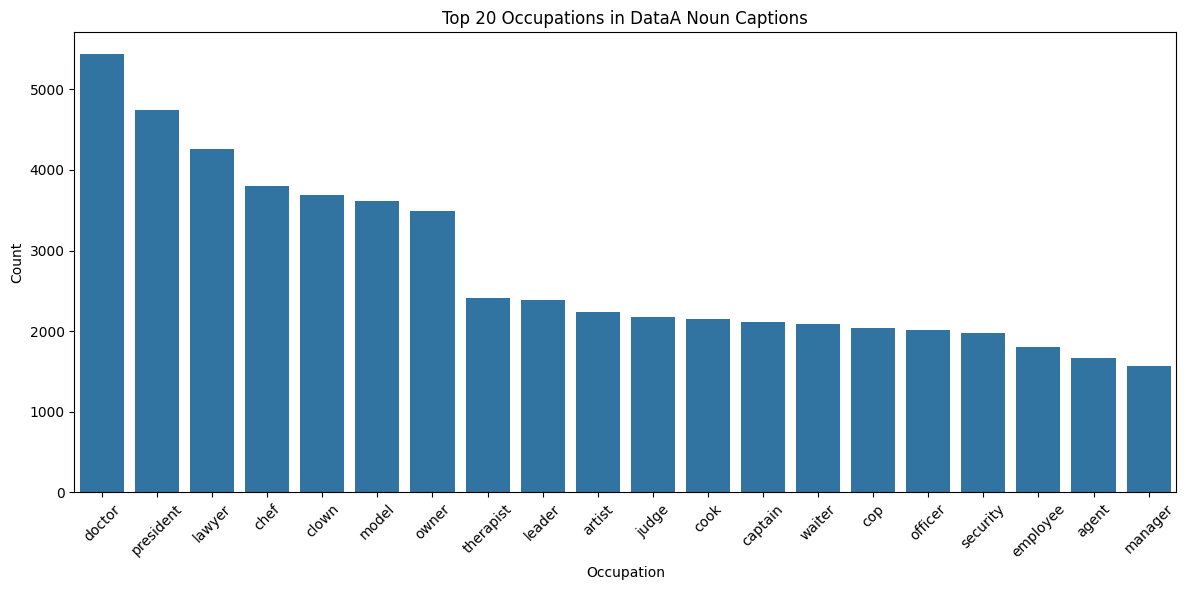

In [76]:
#go over the nouns columns and see which occupations are present
for i in range(len(dataC1)):
    df = dataA1[i]
    df['occupation_counts_nouns'] = df['captions_nouns'].apply(count_occupations)
    dataA1[i] = df
    print(f"Processed occupation counts for nouns in dataA part {(i+1)/len(dataA1)*100:.2f}%")

#count occurences of words and make a histogram for nouns occupation counts
occupation_totals_nouns = Counter()
for i in range(len(dataA1)):
    df = dataA1[i]
    for counts in df['occupation_counts_nouns']:
        occupation_totals_nouns.update(counts)
# Show the most common occupations found
print(occupation_totals_nouns.most_common(100))
#histogram of top 20 occupations for nouns
top_20_nouns = occupation_totals_nouns.most_common(20)
occupations_nouns, counts_nouns = zip(*top_20_nouns)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(occupations_nouns), y=list(counts_nouns))
plt.xticks(rotation=45)
plt.title("Top 20 Occupations in DataA Noun Captions")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


To count the occurrences of professions in the captions, we will use the 2018 U.S. Census occupation data as a reference.  
This dataset provides a comprehensive list of job titles and their frequencies.  

- The Census occupation indexes can be found [here](https://www.census.gov/topics/employment/industry-occupation/guidance/indexes.html).  
- The explanation of the SOC (Standard Occupational Classification) codes is available [here](https://www.bls.gov/soc/2018/major_groups.htm).

The problem with this approach is that occupations occur in their _colloquial_ form and not in their full _official_ title. This will make using the occupation indexes way too difficult. We must find a way to take the census data, and group it into smaller, colloquial terms (for example the occupation of midwife nurse from the census data should simply be nurse or midwife). The following approach is taken:

- Clean the census data by lower casing, removing trailing spaces, taking away special characters like brackets and hyphens.
- Some jobs are "complicated title" See "simpler title" -> lets cut all such instances as they are essentially the same as the simpler titles
- There are some occupations of the form "Analyst\ specified type See type of analyst" and "Clerk\any other specified   Code by duties" etc. I want to remove these and make them simpler
- It can be seen that some titles have entries like "CFO (Chief Financial Officer)" -> create a new column with alternative name, and delete from first column